In [1]:
from infer_veritas import  *
from truthfinder import *


In [2]:
%%time
TR=truthnet(datapath='/home/ishanu/ZED/Research/truthnet/notebooks/data/ptsd/PTSD_cognet_test.csv',target_label='PTSDDx',query_limit=20)
TR.fit(shapnum=50)
rf=TR.calibrate(calibration_num=20000)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 20000/20000 [52:57<00:00,  6.29it/s]


ckeck passed


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.25 sec] [RSS: 0.920493] [loc=0.338 scale=0.716]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [lognorm] [0.39 sec] [RSS: 215.965] [loc=0.362 scale=0.294]
[distfit] >INFO> Compute confidence intervals [parametric]


ckeck passed
CPU times: user 4h 46min 55s, sys: 3min 39s, total: 4h 50min 34s
Wall time: 4h 47min 16s


In [3]:
TR.veritas_model

{'version': '0.0.1',
 'model': qnet.Qnet,
 'model_neg': qnet.Qnet,
 'problem': '',
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc25d34cd30>,
 'LOWER_THRESHOLD': 0.9251489903389586,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc25d34d1e0>,
 'VERITAS_THRESHOLD': 0.7616444922314668,
 'upper_scoretoprobability': <bound method processRoc.scoretoprobability of <zedstat.zedstat.processRoc object at 0x7fc25c330070>>,
 'UPPER_THRESHOLD': 1.2845926699049968,
 'AUC': (0.8323157894736842, 0.8371379530357381, 0.8274936259116303)}

In [4]:
TR.veritas_model

{'version': '0.0.1',
 'model': qnet.Qnet,
 'model_neg': qnet.Qnet,
 'problem': '',
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc25d34cd30>,
 'LOWER_THRESHOLD': 0.9251489903389586,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc25d34d1e0>,
 'VERITAS_THRESHOLD': 0.7616444922314668,
 'upper_scoretoprobability': <bound method processRoc.scoretoprobability of <zedstat.zedstat.processRoc object at 0x7fc25c330070>>,
 'UPPER_THRESHOLD': 1.2845926699049968,
 'AUC': (0.8323157894736842, 0.8371379530357381, 0.8274936259116303)}

In [5]:
rf[1]

,veritas,upper,lower
0,0.810345,1.031549,1.236479
1,0.810345,1.278881,1.265635
2,0.793103,0.938458,1.367487
3,0.896552,0.529569,1.441287
4,0.879310,0.578573,1.770118
...,...,...,...
208,0.931034,0.382479,1.440418
209,0.913793,1.065353,1.286234
210,0.827586,0.710032,1.626444
211,0.927388,0.645137,1.709332


In [6]:
from distfit import distfit  # Distribution fitting
from scipy.stats import t,lognorm  # Used for statistical functions
from zedstat import zedstat  # Custom statistical package


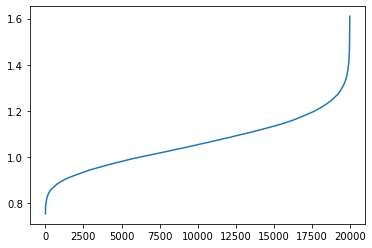

In [7]:
a=rf[0].lower.values
a.sort()
import pylab as plt
plt.plot(a)

In [8]:
rf[0].lower.mean()

1.062063822579224

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3.05558] [loc=1.062 scale=0.112]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 143.199] [loc=0.754 scale=0.308]
[distfit] >INFO> [pareto    ] [0.04 sec] [RSS: 143.199] [loc=-67108863.246 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.19 sec] [RSS: 3.80482] [loc=1.058 scale=0.097]
[distfit] >INFO> [t         ] [0.70 sec] [RSS: 3.05247] [loc=1.061 scale=0.110]
[distfit] >INFO> [genextreme] [0.63 sec] [RSS: 0.852259] [loc=1.016 scale=0.103]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 0.840157] [loc=0.577 scale=0.026]
[distfit] >INFO> [lognorm   ] [0.26 sec] [RSS: 0.920493] [loc=0.338 scale=0.716]
[distfit] >INFO> [beta      ] [0.26 sec] [RSS: 0.714983] [loc=0.678 scale=1.843]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 121.889] [loc=0.754 scale=0.856]
[distfit] >INFO> [loggamma  ] [0.25 sec] [RSS: 3.25242] [loc=-25.819 scale=3.816]
[distfit] >INFO> Compute confidence intervals [para

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta(a=9.08725, b=34.4743, loc=0.677631, scale=1.84285)'}, xlabel='Values', ylabel='Frequency'>)

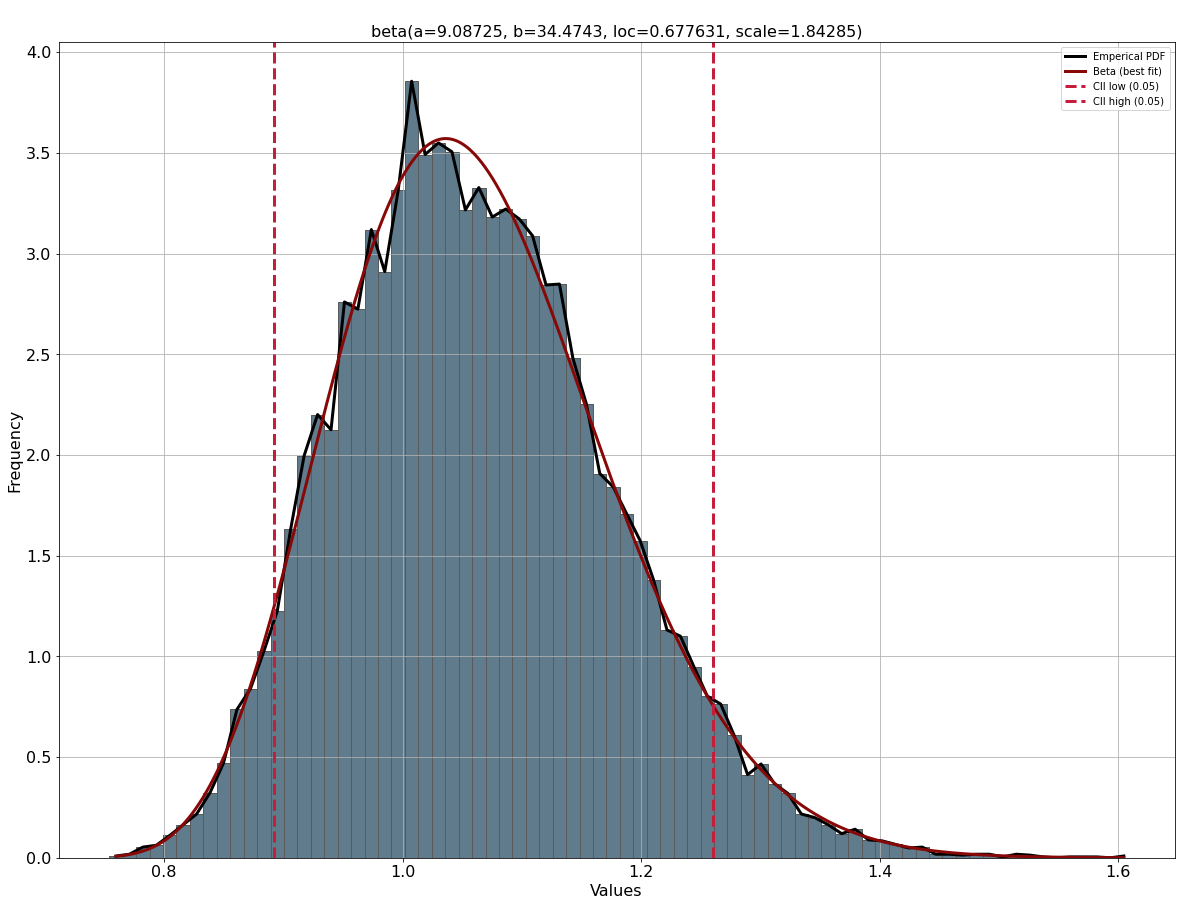

In [9]:
dfit = distfit()
dfit.fit_transform(rf[0].lower.values)
dfit.plot()
#df, loc, scale = dfit.model['params']
#dist = t(df, loc=loc, scale=scale)
#dist.ppf(TR.threshold_alpha)

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:0.677631, scale:1.842848)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta(a=9.08725, b=34.4743, loc=0.677631, scale=1.84285)'}, xlabel='Values', ylabel='Frequency'>)

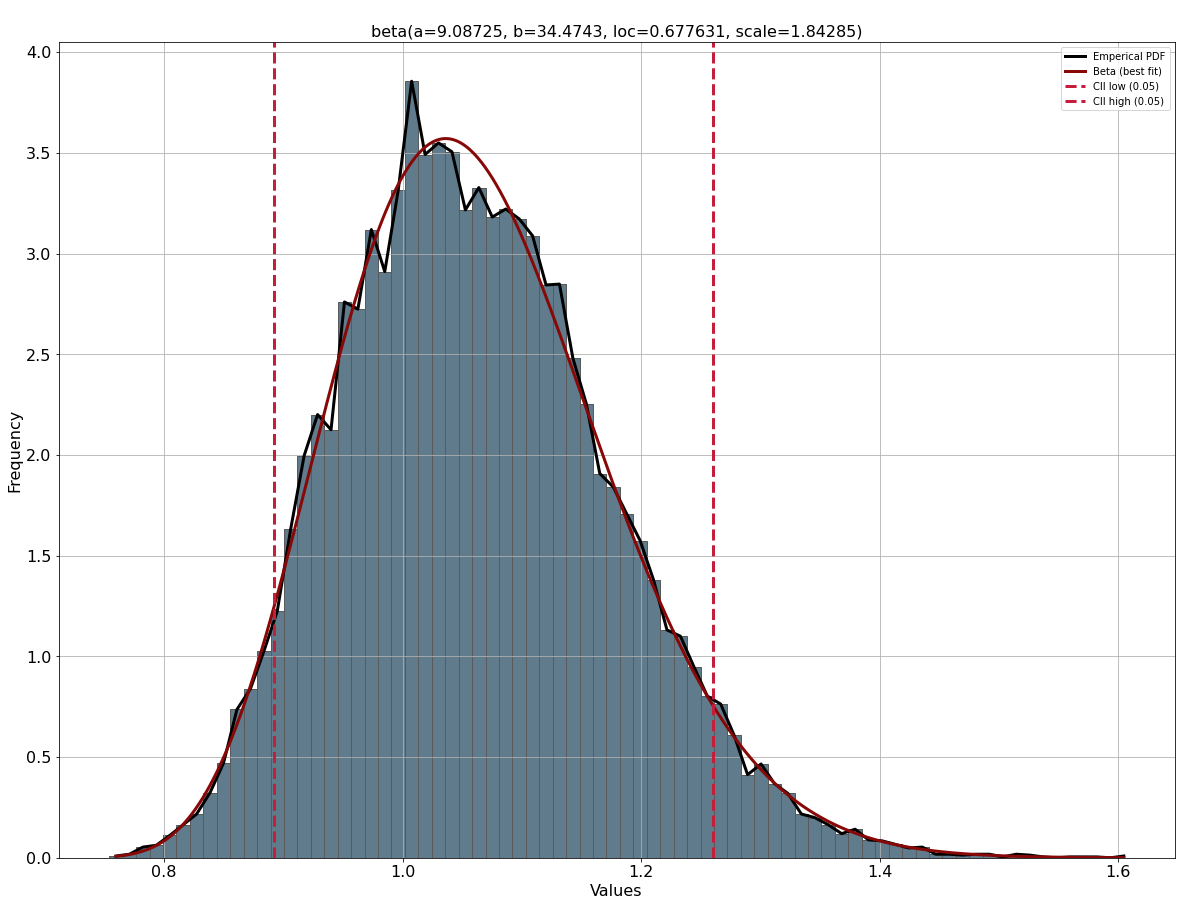

In [10]:
dfit.plot()